# WeatherPy
----

### Analysis
* Southern Hemisphere climates tend to be slightly milder than those at similar latitudes in the Northern Hemisphere. This is because the Southern Hemisphere has significantly more ocean and much less land; water heats up and cools down more slowly than land.

* Highest temperature is found at 0 latitude and as the latidude increases or decreases, temperature drops. This happens as equatorial region receives sunlight straight with less or no angle due to curvature shape of earth.

* There are cities with over 20 mph wind in the northern hemisperes, however there is not a strong relationship between latitude and wind speed. 

In [1]:
# ---Dependencies and Setup--- #
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# ---Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# ---Output File (CSV)
output_data_file = "output_data/cities.csv"

# ---Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Perform a weather check on each city using a series of successive API calls.
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="


#Include a print log of each city as it'sbeing processed (with the city number and city name).
# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : dingle
Processing Record 2 of Set 1 : zhuhai
City not found. Skipping...
Processing Record 3 of Set 1 : rikitea
Processing Record 4 of Set 1 : aykhal
Processing Record 5 of Set 1 : san patricio
Processing Record 6 of Set 1 : esperance
Processing Record 7 of Set 1 : albany
Processing Record 8 of Set 1 : ekimchan
Processing Record 9 of Set 1 : izumo
Processing Record 10 of Set 1 : provideniya
City not found. Skipping...
Processing Record 11 of Set 1 : atuona
Processing Record 12 of Set 1 : clyde river
Processing Record 13 of Set 1 : viedma
Processing Record 14 of Set 1 : hilo
City not found. Skipping...
Processing Record 15 of Set 1 : listvyanka
Processing Record 16 of Set 1 : synya
Processing Record 17 of Set 1 : yellowknife
Processing Record 18 of Set 1 : warrington
Processing Record 19 of Set 1 : geraldton
Processing Record 20 of Set 1 : hobart
Processing Record 21 of Set 1 : hermanus
Processing Rec

City not found. Skipping...
Processing Record 33 of Set 4 : koslan
Processing Record 34 of Set 4 : sao jose da coroa grande
Processing Record 35 of Set 4 : macuspana
Processing Record 36 of Set 4 : chara
Processing Record 37 of Set 4 : nioro
Processing Record 38 of Set 4 : bubaque
Processing Record 39 of Set 4 : galesong
Processing Record 40 of Set 4 : teknaf
Processing Record 41 of Set 4 : phan thiet
Processing Record 42 of Set 4 : asgabat
Processing Record 43 of Set 4 : huilong
Processing Record 44 of Set 4 : arraial do cabo
Processing Record 45 of Set 4 : methoni
Processing Record 46 of Set 4 : raga
Processing Record 47 of Set 4 : najran
Processing Record 48 of Set 4 : talnakh
Processing Record 49 of Set 4 : onega
Processing Record 50 of Set 4 : manyana
City not found. Skipping...
City not found. Skipping...
Processing Record 0 of Set 5 : kamakwie
Processing Record 1 of Set 5 : el progreso
Processing Record 2 of Set 5 : platanos
Processing Record 3 of Set 5 : hoquiam
City not found.

Processing Record 14 of Set 8 : bethel
Processing Record 15 of Set 8 : kathmandu
Processing Record 16 of Set 8 : santa cruz
Processing Record 17 of Set 8 : rypefjord
Processing Record 18 of Set 8 : tagusao
Processing Record 19 of Set 8 : houma
Processing Record 20 of Set 8 : shelopugino
Processing Record 21 of Set 8 : ahipara
Processing Record 22 of Set 8 : svetlogorsk
Processing Record 23 of Set 8 : vysha
Processing Record 24 of Set 8 : lorengau
Processing Record 25 of Set 8 : carson city
Processing Record 26 of Set 8 : porkhov
Processing Record 27 of Set 8 : kununurra
Processing Record 28 of Set 8 : carutapera
City not found. Skipping...
Processing Record 29 of Set 8 : barzas
Processing Record 30 of Set 8 : langsa
Processing Record 31 of Set 8 : chokurdakh
Processing Record 32 of Set 8 : porangatu
Processing Record 33 of Set 8 : olga
Processing Record 34 of Set 8 : buchanan
City not found. Skipping...
Processing Record 35 of Set 8 : luxor
Processing Record 36 of Set 8 : morehead
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a panda data frame using data retrieved
city_data_df = pd.DataFrame({ 
                "City" : city_name_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Humidity" : humidity_list,
                "Cloudiness" : cloudiness_list,
                "Wind Speed" : wind_speed_list,
                "Country" : country_list,
                "Date" : date_list  
})
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dingle,10.9995,122.6711,74.89,88,100,1.99,PH,1613082534
1,Zhuhai,22.2769,113.5678,62.60,72,20,12.66,CN,1613082534
2,Rikitea,-23.1203,-134.9692,79.09,71,82,8.52,PF,1613082534
3,Aykhal,66.0000,111.5000,-23.01,84,6,4.05,RU,1613082535
4,San Patricio,28.0170,-97.5169,41.00,93,90,17.27,US,1613082535


In [5]:
city_data_df.describe(include = "all")

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
count,543,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543,5.430000e+02
unique,543,NaN,NaN,NaN,NaN,NaN,NaN,122,NaN
top,Macuspana,NaN,NaN,NaN,NaN,NaN,NaN,RU,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,58,NaN
mean,NaN,18.896036,17.475621,50.144180,72.504604,50.263352,8.556409,NaN,1.613083e+09
std,NaN,33.523223,92.667304,32.274669,19.438508,39.130950,6.127112,NaN,6.257828e+01
min,NaN,-54.800000,-175.200000,-43.600000,8.000000,0.000000,0.470000,NaN,1.613082e+09
25%,NaN,-8.763650,-63.093750,27.480000,62.000000,4.000000,4.460000,NaN,1.613083e+09
50%,NaN,22.075200,18.346300,62.600000,78.000000,52.000000,7.020000,NaN,1.613083e+09
75%,NaN,46.702300,105.727500,77.000000,87.000000,90.000000,11.160000,NaN,1.613083e+09


In [6]:
#Export the city data into a .csv

city_data_df.to_csv("output_data/cities.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
# Find cities that have humidity over 100%
humidity_over_100 = city_data_df.loc[city_data_df["Humidity"] > 100, :]

if humidity_over_100.empty == True:
    print("There are no cities with humidity values over 100%")
    print("Using original dataframe to continue with plotting...")
    
# Extract relevant fields from the data frame for plotting
    latitudes = city_data_df["Lat"]
    temperatures = city_data_df["Max Temp"]
    humidity = city_data_df["Humidity"]
    cloudiness = city_data_df["Cloudiness"]
    windspeed = city_data_df["Wind Speed"]
    
else:
# Get the indices of cities that have humidity over 100% ---
    Humidityover100Index = humidity_over_100.index
    
# Create a clean DataFrame by dropping all humidity outliers by index found above ---
    clean_city_data = city_data_df.drop(Humidityover100Index).reset_index(drop=True)
    clean_city_data.head()
    
# Extract relevant fields from the data frame for plotting ---
    latitudes = clean_city_data["Lat"]
    temperatures = clean_city_data["Max Temp"]
    humidity = clean_city_data["Humidity"]
    cloudiness = clean_city_data["Cloudiness"]
    windspeed = clean_city_data["Wind Speed"]

# Export the new dataframe into a csv ---
    clean_city_data.to_csv("../output_data/clean_city_data.csv", index=True, index_label="City ID", header=True)      

There are no cities with humidity values over 100%
Using original dataframe to continue with plotting...


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

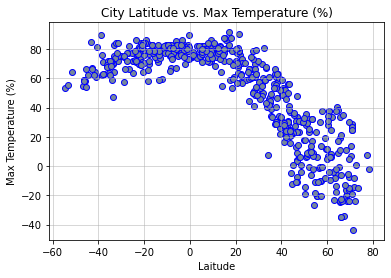

In [8]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], facecolor = "lightslategrey", edgecolor = "blue")

# Set title
plt.title("City Latitude vs. Max Temperature (%)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

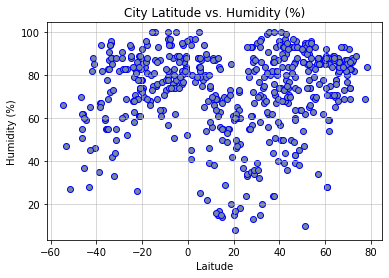

In [9]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolor = "lightslategrey", edgecolor = "blue")

# Set title
plt.title("City Latitude vs. Humidity (%)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

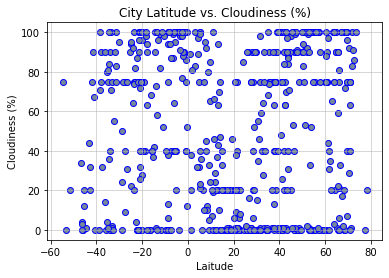

In [10]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], facecolor = "lightslategrey", edgecolor = "blue")

# Set title
plt.title("City Latitude vs. Cloudiness (%)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

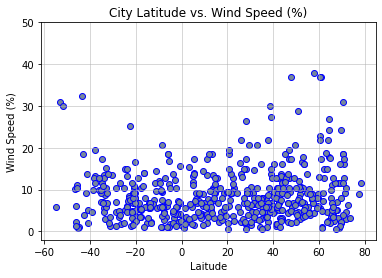

In [11]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], facecolor = "lightslategrey", edgecolor = "blue")
plt.title("City Latitude vs. Wind Speed (%)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Wind Speed.png")

## Linear Regression

In [12]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = city_data_df.loc[city_data_df["Lat"] >= 0]
southern_hemisphere = city_data_df.loc[city_data_df["Lat"] < 0]

# Define function for creating linear regression and scatter plot
def linear_regression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")    

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.87


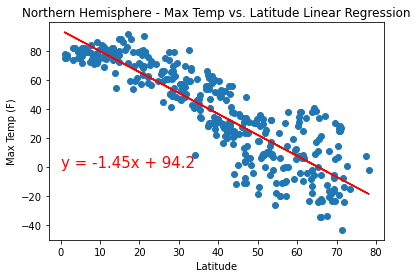

In [13]:
# Call an function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

#### There is a strong negative correlation between latitude and max temperature for northern hemisphere. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.58


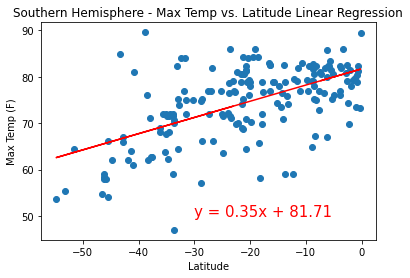

In [14]:
# Call an function #1
equation = linear_regression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

#### There is a moderate positive correlation between latitude and max temperature for southern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.3


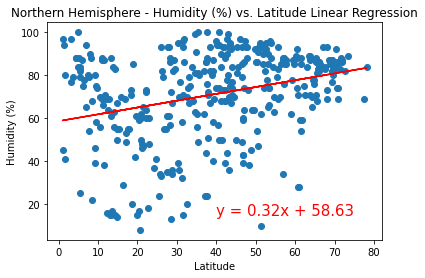

In [15]:
# Call an function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

#### There is a moderate positive correlation between latitude and humidity for northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.43


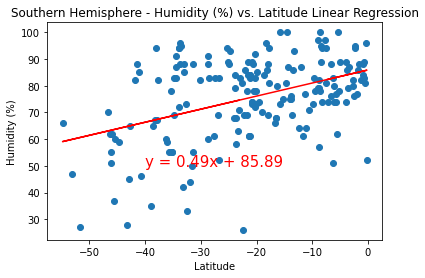

In [16]:
# Call an function #1
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, -40, 50)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

#### There is a moderate positive correlation between latitude and humidity for southern hemisphere. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.21


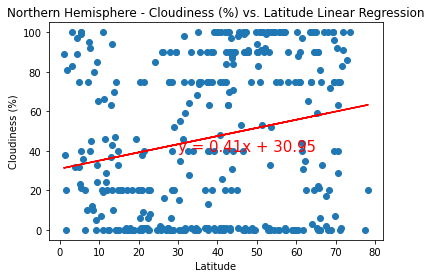

In [17]:
# Call an function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

#### There is a weak positive correlation between latitude and cloudiness for northern hemisphere. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.28


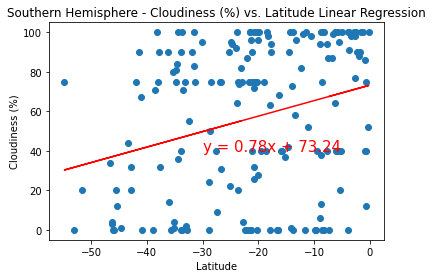

In [18]:
# Call an function #1
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

#### There is a positive correlation between latitude and cloudiness for southern hemisphere. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.14


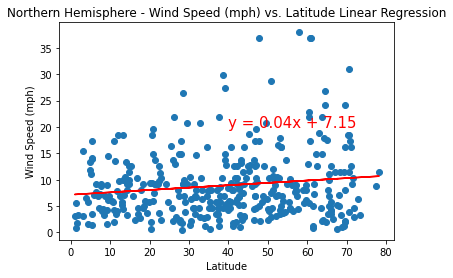

In [19]:
# Call an function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, 40, 20)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

#### There is a weak positive correlation between latitude and wind speed for northern hemisphere. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.24


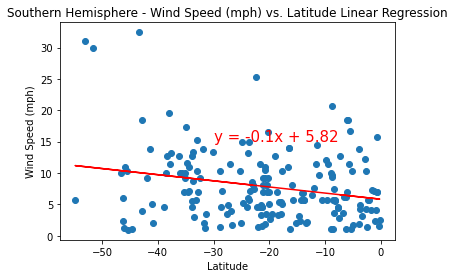

In [20]:
# Call an function #1
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, -30, 15)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

#### There is a negative correlation between latitude and wind speed for southern hemisphere. 